<a href="https://colab.research.google.com/github/mohansharma077/Fashion-Recommendation-System-using-resnet50/blob/main/Fashion_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Fashion recommendation system

A recommendation system is a type of machine learning system that is designed to suggest items to users based on their preferences and behaviors. These systems can be used in a variety of applications, including e-commerce websites, streaming services, social media platforms, and more.

In the context of fashion, a recommendation system uses machine learning algorithms to suggest clothing items or outfits to users based on their preferences and past interactions. These systems may analyze factors such as color preferences, style preferences, past purchases, and browsing history to provide personalized recommendations.

The fashion recommendation system typically consists of two parts: a data collection component and a recommendation engine. The data collection component gathers user data such as browsing history, purchase history, and user feedback. The recommendation engine then uses this data to generate personalized recommendations for each user.

 Here's a revised table summarizing the algorithms and models used in fashion recommendation systems::

| Algorithm/Model | Description |
|-----------------|-------------|
| Collaborative Filtering | Recommends items based on the preferences of users with similar interests using user-item interaction data.
 |
| Content-Based Filtering | Recommends items based on a user's past preferences and analyzes item features like color, style, and brand.
 |
| Hybrid Filtering | Combines collaborative and content-based filtering approaches for more accurate and personalized recommendations. 
|
| Deep Learning Models | Uses CNN and RNN to analyze clothing item images and descriptions to provide personalized recommendations. 
|
| Matrix Factorization | Uses algorithms like SVD and ALS to predict missing values in user-item interaction data and generate recommendations. 
|



#Convolutional Neural Networks
CNN stands for Convolutional Neural Network. It is a type of deep learning model that is commonly used in image recognition tasks, such as object detection, classification, and segmentation.

In the context of recommendation systems, CNNs can be used to analyze clothing item images and extract relevant features such as color, pattern, and style. These features can then be used to generate personalized recommendations for users based on their preferences and past interactions.

To use a CNN in a recommendation system, the model is typically trained on a large dataset of clothing item images and their corresponding labels. Once trained, the model can be used to analyze new images and generate feature vectors that capture the key characteristics of each item.

Overall, using a CNN in a recommendation system can help improve the accuracy and relevance of recommendations by taking into account visual cues and preferences.


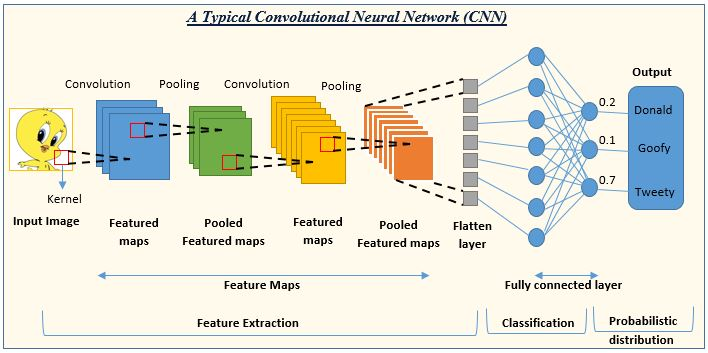

📊Application Flow-Chart

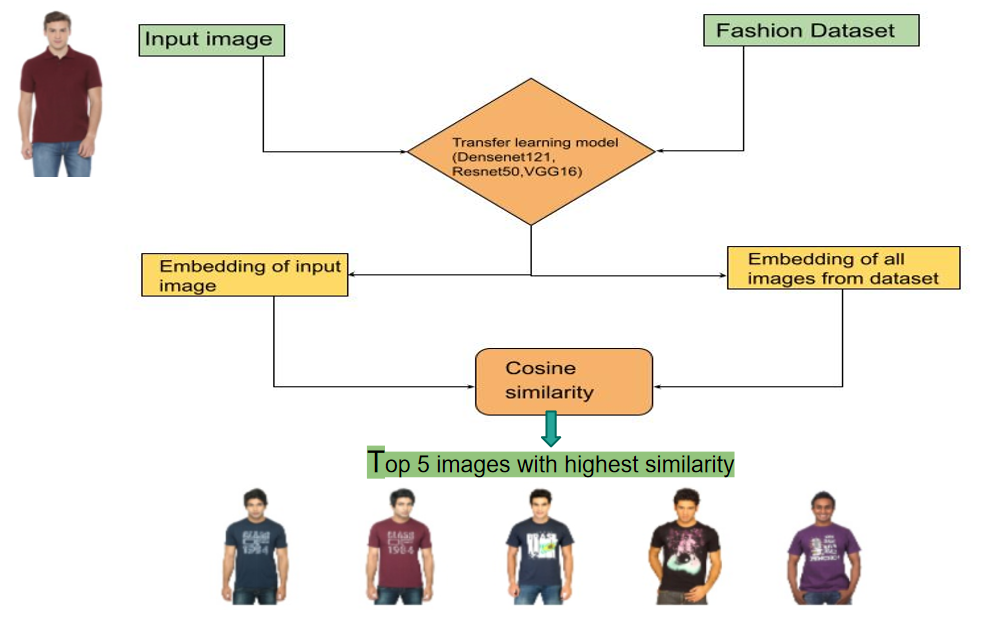

Let’s now dive into building a fashion recommendation system with Machine Learning. I will simply start with importing all the packages we need for this task:

In [2]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import tensorflow 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
import numpy as np
import pandas as pd
from matplotlib.pyplot import plot as plt

import streamlit as st
from PIL import Image 
import os
import tqdm
import pickle
from numpy.linalg import norm




In [5]:
model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable=False
model=tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [7]:
def extract_features(img_path,model):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array,axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result/norm(result)
    
    return normalized_result

In [6]:
filenames = []
images='/content/drive/MyDrive/Untitled folder (1)/images'

for file in os.listdir(images):
    filenames.append(os.path.join(images,file))

feature_list = []

for file in filenames:
    feature_list.append(extract_features(file,model))
pickle.dump(feature_list,open('embeddings.pkl','wb'))
pickle.dump(filenames,open('filenames.pkl','wb'))


1/1 [==============================] - 0s 354ms/step


In [8]:
st.title("Fashion Recommendation System")


2023-05-14 07:10:41.023 
  command:

    streamlit run /usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [9]:
feature_list = np.array(pickle.load(open('embeddings.pkl','rb')))
filenames = pickle.load(open('filenames.pkl','rb'))

In [10]:
def save_uploaded_file(uploaded_file):
  try:
    with open(os.path.join('uploads',uploaded_file.name),'wb') as f:
      f.write(uploaded_file.getbuffer())
      return 1
  except:
    return 0


In [11]:
from sklearn.neighbors import NearestNeighbors
def recommend(features,feature_list):
  neighbors=NearestNeighbors(n_neighbors=6,algorithm='brute',metric='euclidean')
  neighbors.fit(feature_list)
  distances,indices=neighbors.Kneighbors([features])
  return indices

In [13]:
uploaded_file=st.file_uploader('choose an image to upload')

In [78]:
if uploaded_file is not None:
  if save_uploaded_file(uploaded_file):
    display_image=Image.open(uploaded_file)
    st.image(display_image)
    features=extract_features(os.path.join('uploads',uploaded_file.name),model)
    indices=recommend(features,feature_list)
    col1,col2,col3,col4,col5=st.beta_columns(5)
    with col1:
      st.image(filenames[indices[0][0]])
    with col2:
      st.image(filenames[indices[0][0]])
    with col3:
      st.image(filenames[indices[0][0]])
    with col4:
      st.image(filenames[indices[0][0]])
    with col5:
      st.image(filenames[indices[0][0]])
  else:
    st.header("some error occured while saving the file")


In [14]:
import cv2

In [62]:


from google.colab.patches import cv2_imshow

In [79]:
def recommender1(img_path):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)
    neighbors = NearestNeighbors(n_neighbors=6,algorithm='brute',metric='euclidean')
    neighbors.fit(feature_list)

    distances,indices = neighbors.kneighbors([normalized_result])

    images = []
    for file in indices[0][1:5]:
        # Load an image from a file
        temp_img = cv2.imread(filenames[file])
        # Resize the image to 512x512 pixels
        temp_img = cv2.resize(temp_img,(512,512))
        # Add the image to the list of images
        images.append(temp_img)
    return np.array(images)

  


1/1 [==============================] - 0s 223ms/step


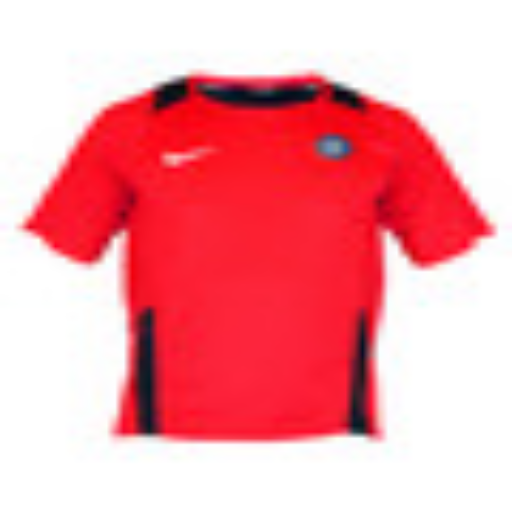

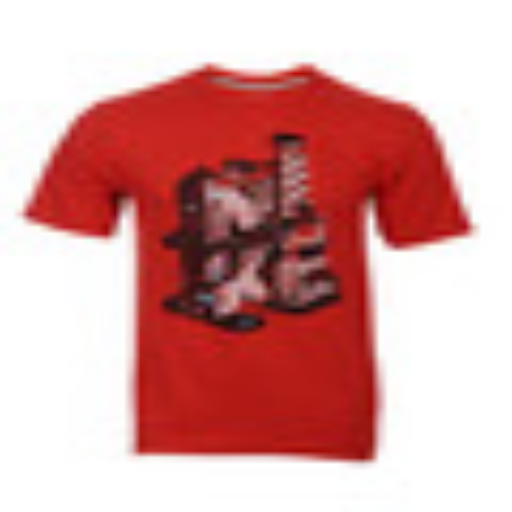

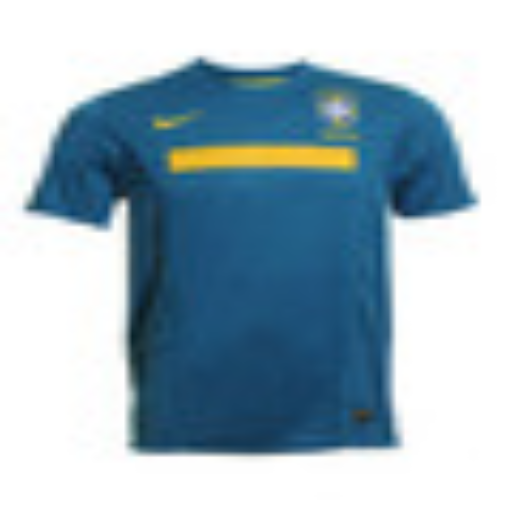

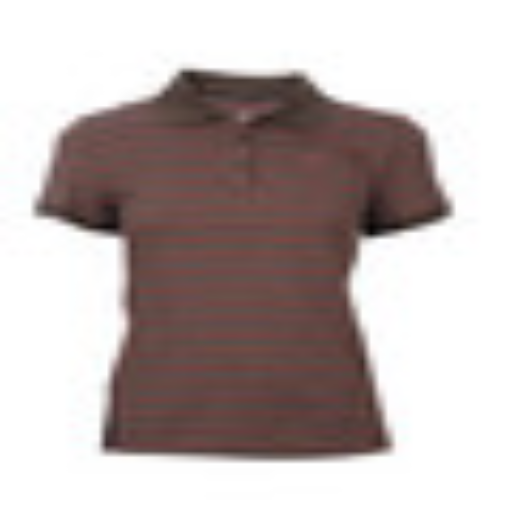

In [86]:
import gradio as gr
import cv2

def recommender(img_path):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)
    neighbors = NearestNeighbors(n_neighbors=6,algorithm='brute',metric='euclidean')
    neighbors.fit(feature_list)

    distances,indices = neighbors.kneighbors([normalized_result])

    images = []
    for file in indices[0][1:5]:
        # Load an image from a file
        temp_img = cv2.imread(filenames[file])
        # Resize the image to 512x512 pixels
        temp_img = cv2.resize(temp_img,(512,512))
        # Add the image to the list of images
        images.append(temp_img)
    from google.colab.patches import cv2_imshow
    for i in range(len(images)):
      cv2_imshow(images[i])

img_path1='/content/th (2).jpg'
recommender(img_path1)

In [83]:

gr.Interface(fn=recommender1, inputs=gr.inputs.Image(), outputs=gr.outputs.Image(type="numpy")).launch(debug=True)

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:43: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


1/1 [==============================] - 0s 455ms/step


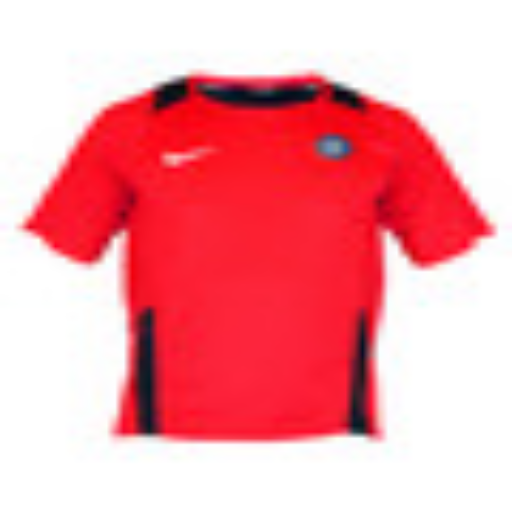

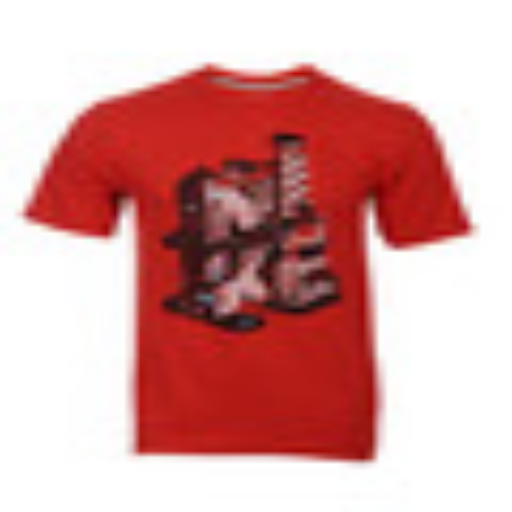

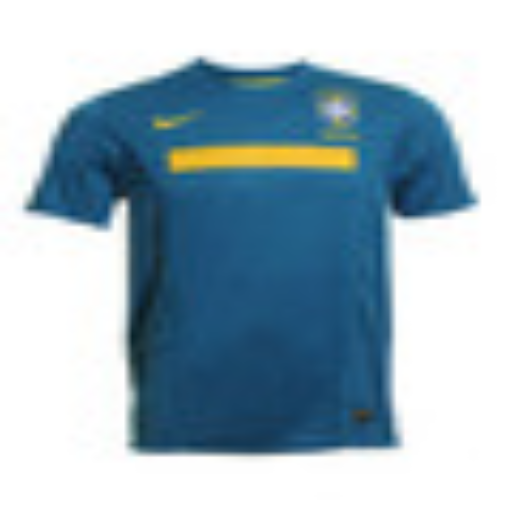

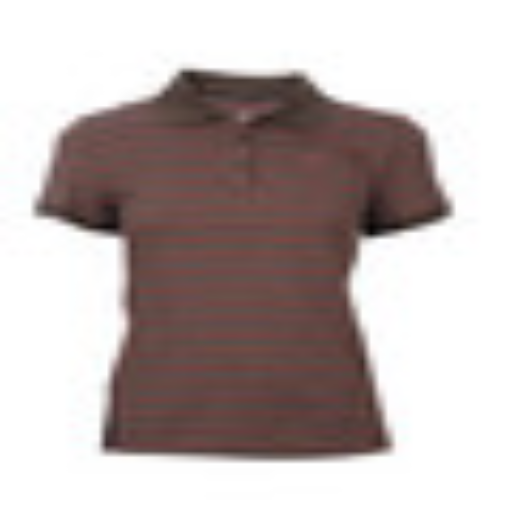

In [87]:
img_path1='/content/th (2).jpg'
recommender(img_path1)